In [1]:
import os

import pandas as pd
import pandas_datareader.data as pdr

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

import seaborn as sns

plt.style.use('seaborn-whitegrid')
%matplotlib inline

import itertools

In [36]:
# Train 데이터 불러오기 (00년 ~ 21년)
# 2021년 Train / 2022년 2022Train

data = pd.read_csv('전체.csv', encoding='cp949')
# data = data[38:]

# data = data.drop(['price'], axis = 1)
data = data.drop(['전체_temp'], axis = 1)
data = data.drop(['전체_hum'], axis = 1)

data = data.drop(['강원_temp'], axis = 1)
data = data.drop(['경기_temp'], axis = 1)
data = data.drop(['경남_temp'], axis = 1)
data = data.drop(['경북_temp'], axis = 1)
data = data.drop(['광주_temp'], axis = 1)
data = data.drop(['대구_temp'], axis = 1)
data = data.drop(['대전_temp'], axis = 1)
data = data.drop(['부산_temp'], axis = 1)
data = data.drop(['서울_temp'], axis = 1)
data = data.drop(['세종_temp'], axis = 1)
data = data.drop(['울산_temp'], axis = 1)
data = data.drop(['충남_temp'], axis = 1)
data = data.drop(['충북_temp'], axis = 1)
data = data.drop(['전남_temp'], axis = 1)
data = data.drop(['전북_temp'], axis = 1)
data = data.drop(['제주_temp'], axis = 1)
data = data.drop(['인천_temp'], axis = 1)

data = data.drop(['강원_hum'], axis = 1)
data = data.drop(['경기_hum'], axis = 1)
data = data.drop(['경남_hum'], axis = 1)
data = data.drop(['경북_hum'], axis = 1)
data = data.drop(['광주_hum'], axis = 1)
data = data.drop(['대구_hum'], axis = 1)
data = data.drop(['대전_hum'], axis = 1)
data = data.drop(['부산_hum'], axis = 1)
data = data.drop(['서울_hum'], axis = 1)
data = data.drop(['세종_hum'], axis = 1)
data = data.drop(['울산_hum'], axis = 1)
data = data.drop(['충남_hum'], axis = 1)
data = data.drop(['충북_hum'], axis = 1)
data = data.drop(['전남_hum'], axis = 1)
data = data.drop(['전북_hum'], axis = 1)
data = data.drop(['제주_hum'], axis = 1)
data = data.drop(['인천_hum'], axis = 1)
    
data = data.set_index('date')
data = data.fillna(method='ffill')
data.tail()

,price
date,
2021-12-27,48002138
2021-12-28,38070210
2021-12-29,52093193
2021-12-30,47463341
2021-12-31,66341333


(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '2021-11-12'),
  Text(0.0, 0, '2021-01-01'),
  Text(50.0, 0, '2021-02-20'),
  Text(100.0, 0, '2021-04-11'),
  Text(150.0, 0, '2021-05-31'),
  Text(200.0, 0, '2021-07-20'),
  Text(250.0, 0, '2021-09-08'),
  Text(300.0, 0, '2021-10-28'),
  Text(350.0, 0, '2021-12-17'),
  Text(400.0, 0, '')])

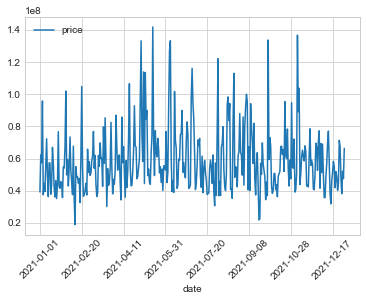

In [37]:
fig = data.plot()
plt.xticks(rotation=45)

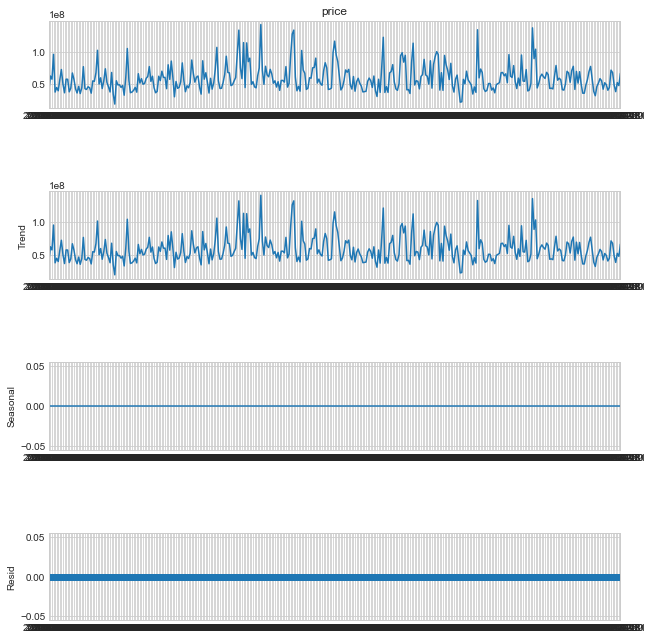

In [38]:
decomposition = sm.tsa.seasonal_decompose(data['price'], model = 'additive', period = 1)
fig = decomposition.plot()
fig.set_size_inches(10,10)
plt.show()

In [34]:
train_data, test_data = train_test_split(data, test_size= 0.2, shuffle = False)

c:\Users\ASIA-08\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


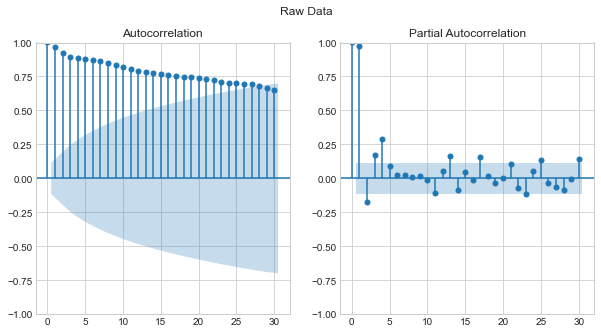

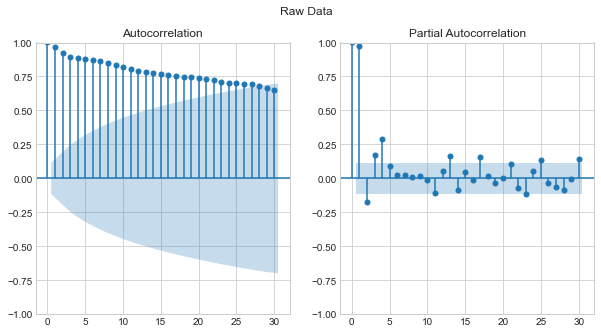

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(train_data.values.squeeze(), lags = 30, ax = ax[0])
sm.graphics.tsa.plot_pacf(train_data.values.squeeze(), lags = 30, ax = ax[1])

In [8]:
diff_train_data = train_data.copy()
diff_train_data = diff_train_data['price'].diff()
diff_train_data = diff_train_data.dropna()
print('##### Raw Data #####')
print(train_data)
print('##### Differenced Data #####')
print(diff_train_data)

##### Raw Data #####
               price
date                
2021-01-01  39209808
2021-01-02  62239672
2021-01-03  57365413
2021-01-04  95785399
2021-01-05  37415973
...              ...
2021-10-15  51995436
2021-10-16  67242373
2021-10-17  67708859
2021-10-18  62522903
2021-10-19  65634108

[292 rows x 1 columns]
##### Differenced Data #####
date
2021-01-02    23029864.0
2021-01-03    -4874259.0
2021-01-04    38419986.0
2021-01-05   -58369426.0
2021-01-06     7052197.0
                 ...    
2021-10-15     1465494.0
2021-10-16    15246937.0
2021-10-17      466486.0
2021-10-18    -5185956.0
2021-10-19     3111205.0
Name: price, Length: 291, dtype: float64


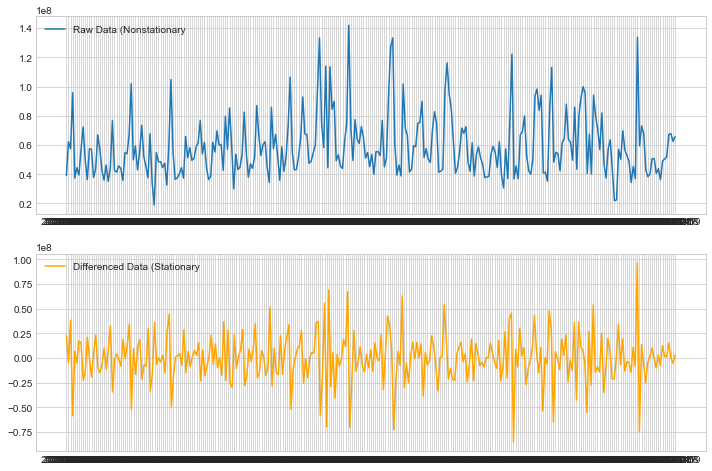

In [9]:
plt.figure(figsize = (12, 8))
plt.subplot(211)
plt.plot(train_data['price'])
plt.legend(['Raw Data (Nonstationary'])
plt.subplot(212)
plt.plot(diff_train_data, 'orange')
plt.legend(['Differenced Data (Stationary'])
plt.show()

c:\Users\ASIA-08\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


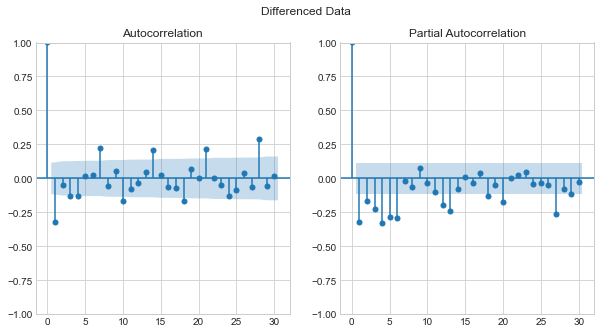

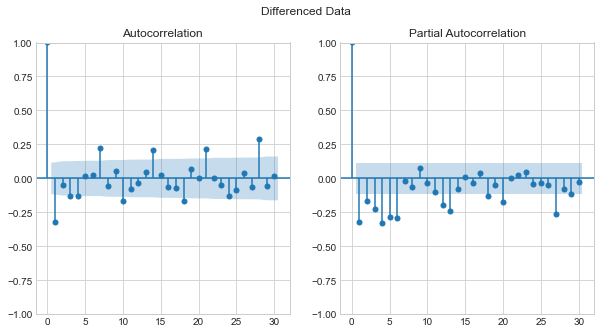

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle('Differenced Data')
sm.graphics.tsa.plot_acf(diff_train_data.values.squeeze(), lags = 30, ax = ax[0])
sm.graphics.tsa.plot_pacf(diff_train_data.values.squeeze(), lags = 30, ax = ax[1])

In [15]:
model =  sm.tsa.arima.ARIMA(train_data.values, order = (1, 1, 1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  292
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5310.302
Date:                Tue, 02 Aug 2022   AIC                          10626.604
Time:                        12:03:25   BIC                          10637.624
Sample:                             0   HQIC                         10631.018
                                - 292                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2878      0.062      4.609      0.000       0.165       0.410
ma.L1         -0.9716      0.018    -53.642      0.000      -1.007      -0.936
sigma2      5.021e+14    1.9e-18   2.64e+32      0.000    5.02e+14    5.02e+14
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                82.97
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.68   Skew:                             1.08
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.91e+48. Standard errors may be unstable.
"""

In [16]:
print('Examples of parameter combinations for Seasonal ARIMA...')

p = range(0, 3)
d = range(1, 2)
q = range(0, 3)
pdq = list(itertools.product(p,d,q))

aic = []
for i in pdq:
    model = sm.tsa.arima.ARIMA(train_data.values, order = (i))
    model_fit = model.fit()
    print(f'ARIMA:{i} >> AIC : {round(model_fit.aic,2)}')
    aic.append(round(model_fit.aic,2))    

Examples of parameter combinations for Seasonal ARIMA...
ARIMA:(0, 1, 0) >> AIC : 10732.9
ARIMA:(0, 1, 1) >> AIC : 10644.2
ARIMA:(0, 1, 2) >> AIC : 10621.27
ARIMA:(1, 1, 0) >> AIC : 10704.37
ARIMA:(1, 1, 1) >> AIC : 10626.6
ARIMA:(1, 1, 2) >> AIC : 10621.97
ARIMA:(2, 1, 0) >> AIC : 10698.37
ARIMA:(2, 1, 1) >> AIC : 10626.88


c:\Users\ASIA-08\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ASIA-08\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA:(2, 1, 2) >> AIC : 10620.48


In [18]:
optimal = [(pdq[i], j) for i, j in enumerate(aic) if j == min(aic)]
optimal

[((2, 1, 2), 10620.48)]

In [19]:
model_opt = sm.tsa.arima.ARIMA(train_data.values, order = optimal[0][0])
model_opt_fit = model_opt.fit()

model_opt_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  292
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5305.239
Date:                Tue, 02 Aug 2022   AIC                          10620.477
Time:                        12:03:56   BIC                          10638.844
Sample:                             0   HQIC                         10627.835
                                - 292                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6505      0.075     -8.670      0.000      -0.798      -0.503
ar.L2          0.2366      0.058      4.075      0.000       0.123       0.350
ma.L1         -0.0128      0.051     -0.250      0.803      -0.114       0.088
ma.L2         -0.9317      0.053    -17.624      0.000      -1.035      -0.828
sigma2      3.888e+14        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                73.12
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.74   Skew:                             1.04
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.61e+46. Standard errors may be unstable.
"""

In [20]:
prediction = model_opt_fit.forecast(len(test_data))
predicted_value = prediction[0]
predicted_ub = prediction[2][:,0]
predicted_lb = prediction[2][:,1]
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)

IndexError: invalid index to scalar variable.

ValueError: x and y must have same first dimension, but have shapes (53,) and (1,)

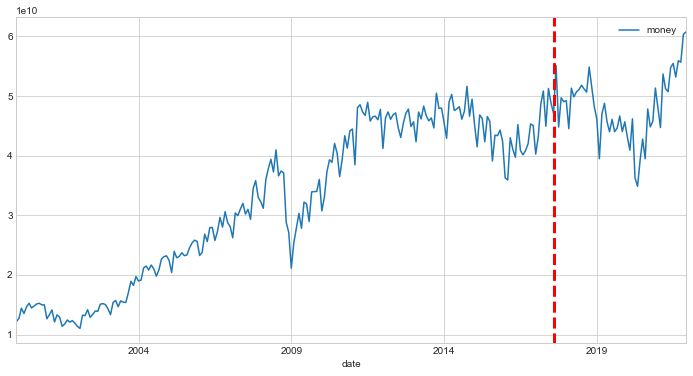

In [72]:
fig, ax = plt.subplots(figsize = (12, 6))
data.plot(ax = ax)
plt.axvline('2017-08-01', 2017, 0, linestyle='--', color = 'r', linewidth=3, label = 'Start of Forecast')
ax.plot(predict_index, predicted_value, label = 'Prediction')
ax.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label = '0.95 Prediction Interval')
ax.legend(loc = 'upper left')
plt.suptitle(f'ARIMA {optimal[0][0]} Prediction Results(r2_score: {round(r2,2)})')
plt.show()

In [73]:
prediction = model_opt_fit.forecast(len(test_data))
predicted_value = prediction[0]
predicted_ub = prediction[2][:,0]
predicted_lb = prediction[2][:,1]
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)

IndexError: invalid index to scalar variable.